### One-Dimensional Aggregation: Paper Metadata

In [1]:
exportdate = 20180315

The usual preparations...

In [20]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [3]:
%matplotlib notebook

In [4]:
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv(f'../analysis/{exportdate}repract_evaluation_counts_with_papermeta.csv')
df.head(1)

,PaperId,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings,Venue,Year,TotalPages,IndTrack,AcadVsInd,Title,Authors,Summary
0,248,2,5,6,0,0,137,7,6,13,ICSE,2014,10,No,Academic,Requirements fixation,"Rahul Mohanani, Paul Ralph, Ben Shreeve",An experiment with students on the effects of ...


In [6]:
nozeroes = df[[col for col in df.columns if col not in ['ZeroRating', 'NotShown']]]
nozeroes.head(1)

,PaperId,Essential,Worthwhile,Unimportant,Unwise,PosRatings,NegRatings,TotalRatings,Venue,Year,TotalPages,IndTrack,AcadVsInd,Title,Authors,Summary
0,248,2,5,6,0,7,6,13,ICSE,2014,10,No,Academic,Requirements fixation,"Rahul Mohanani, Paul Ralph, Ben Shreeve",An experiment with students on the effects of ...


In [7]:
def percentages(df, totalscolumn):
    ndf = pd.DataFrame(df, copy=True)
    for col in df.columns:
        if col != totalscolumn:
            ndf[col] = df[col] / df[totalscolumn]
    return ndf
    
def colslice(df, fro, to):
    return df[list(df.columns.values)[fro:to]]

def graphic(df, fro, to, groupby, 
            absolute=False, sortby='PosRatings', bbox_to_anchor=None, groupbyname=None):
    if not absolute:
        colslice(
            percentages(
                nozeroes.groupby(groupby).sum()[
                    list(df.columns.values)[1:8]], 'TotalRatings'
            ).sort_values(sortby, ascending=False), fro, to
        ).plot.barh(rot=0, stacked=True, colormap='bwr')
        plt.xlim(0,1)
    else:
        colslice(
            nozeroes.groupby(groupby).sum()[
                    list(df.columns.values)[1:8]].sort_values(sortby, ascending=False), fro, to
        ).plot.barh(rot=0, stacked=True, colormap='bwr')
    plt.title(f'Evaluations by {groupby if not groupbyname else groupbyname}')
    plt.ylabel('')
    plt.xlabel(f'{"Percentage" if not absolute else "Number"} of Evaluations')
    plt.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor);

In [8]:
ratings = ['Essential', 'Worthwhile', 'Unimportant', 'Unwise']

### By Conference Venue

In [9]:
percentages(df.groupby('Venue').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings
Venue,,,,,,,,,
REFSQ,0.267686,0.489484,0.212237,0.030593,0.066922,31.342256,0.757170,0.242830,523
RE,0.229305,0.471026,0.253311,0.046358,0.071192,29.350993,0.700331,0.299669,1208
ICSE,0.267380,0.411765,0.278075,0.042781,0.058824,30.224599,0.679144,0.320856,187
FSE,0.218750,0.437500,0.281250,0.062500,0.125000,36.375000,0.656250,0.343750,32
ESEM,0.176471,0.428571,0.336134,0.058824,0.058824,26.672269,0.605042,0.394958,119
ESEC/FSE,0.277778,0.305556,0.333333,0.083333,0.055556,32.277778,0.583333,0.416667,36


Counts

<IPython.core.display.Javascript object>


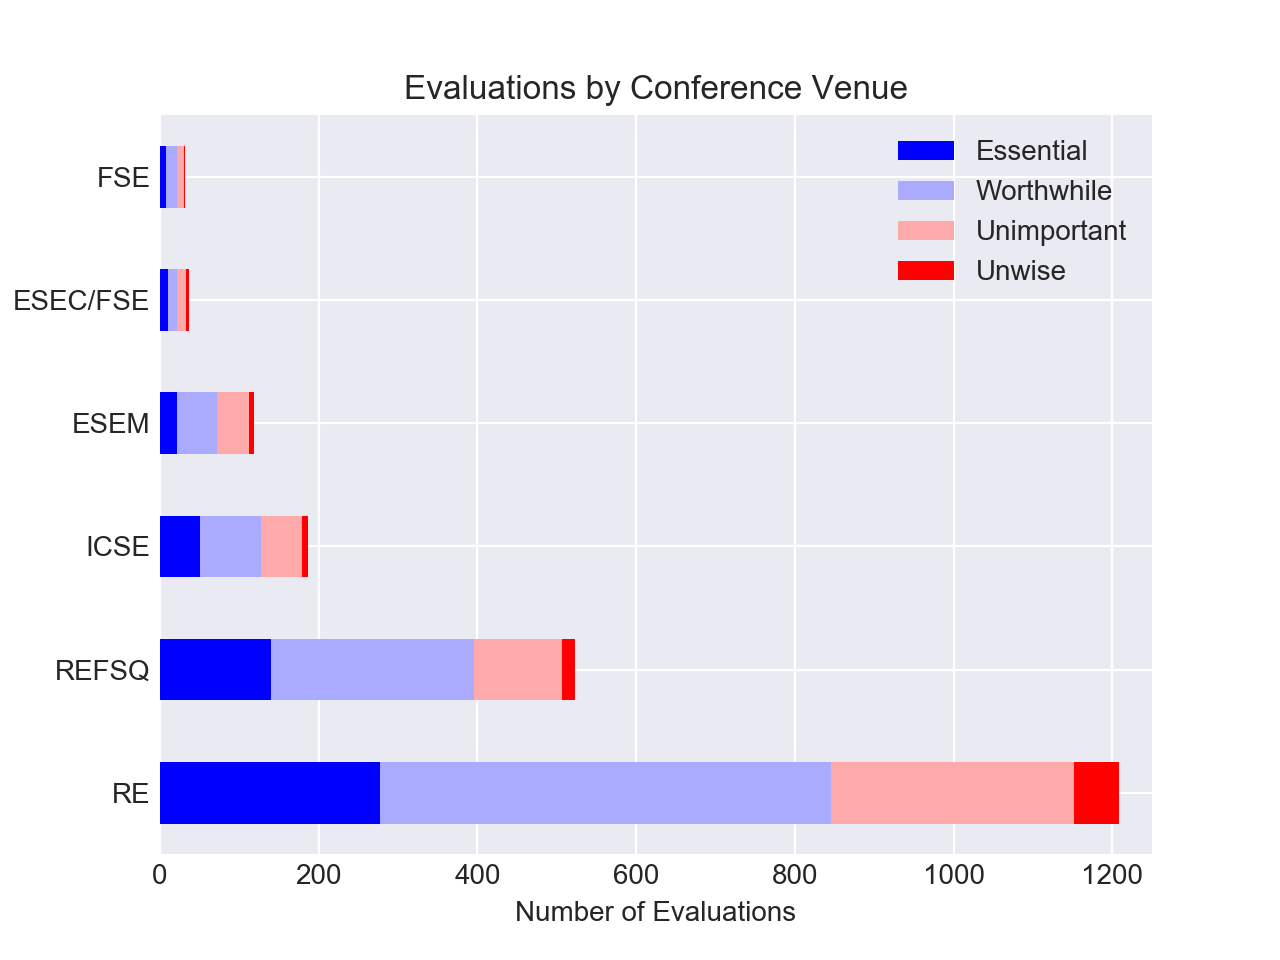

In [10]:
graphic(nozeroes, 0,4,'Venue', absolute=True, groupbyname='Conference Venue')
plt.xlim(0,1250);

Percentages

<IPython.core.display.Javascript object>


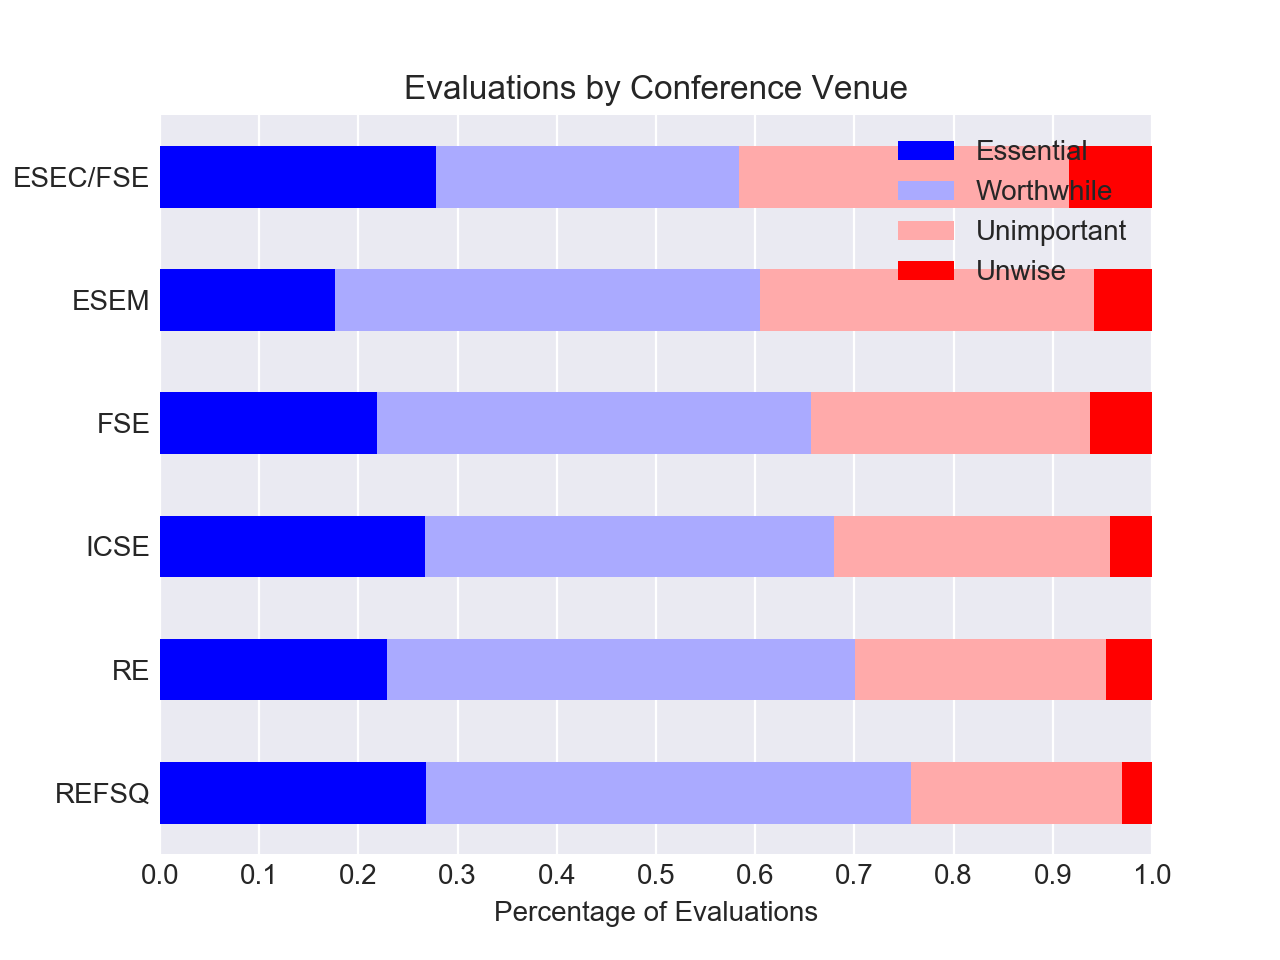

In [22]:
graphic(nozeroes, 0,4,'Venue', groupbyname='Conference Venue')
plt.xticks(np.arange(0,1.1,0.1));

### By Year

In [12]:
percentages(df.groupby('Year').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings
Year,,,,,,,,,
2010,0.269481,0.493506,0.198052,0.038961,0.068182,28.639610,0.762987,0.237013,308
2011,0.263566,0.476744,0.220930,0.038760,0.096899,28.554264,0.740310,0.259690,258
2012,0.218868,0.513208,0.230189,0.037736,0.056604,31.207547,0.732075,0.267925,265
2013,0.255814,0.430233,0.264535,0.049419,0.075581,30.319767,0.686047,0.313953,344
2015,0.228216,0.456432,0.278008,0.037344,0.045643,29.452282,0.684647,0.315353,241
2014,0.225352,0.456338,0.267606,0.050704,0.064789,32.315493,0.681690,0.318310,355
2016,0.218563,0.440120,0.293413,0.047904,0.071856,28.568862,0.658683,0.341317,334


Counts

<IPython.core.display.Javascript object>


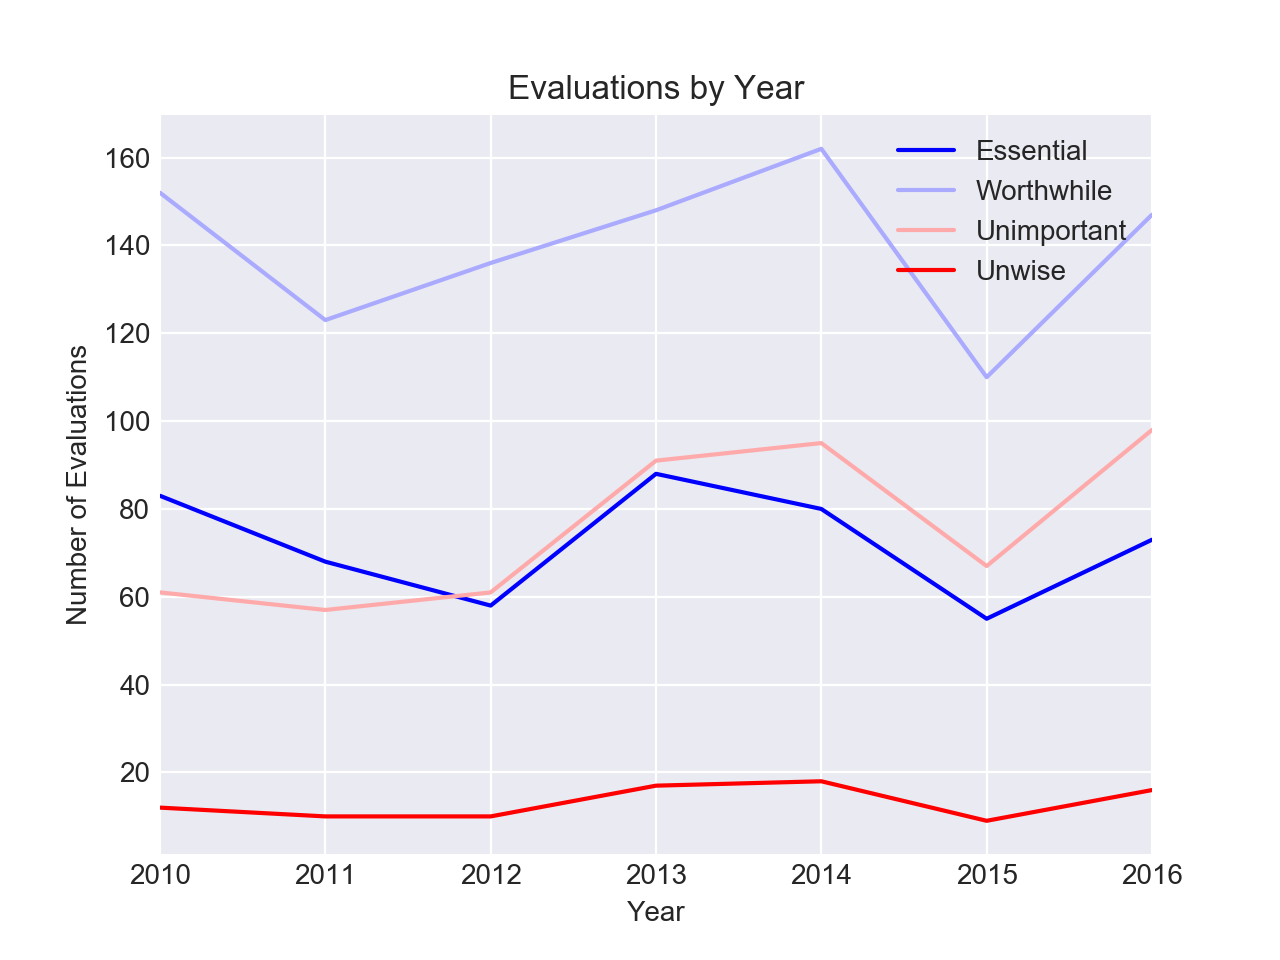

In [13]:
df.groupby('Year').sum()[list(df.columns.values)[1:10]][ratings].plot(cmap='bwr')
plt.xlim(2010,2016)
plt.ylabel('Number of Evaluations')
plt.title('Evaluations by Year');

Percentages

<IPython.core.display.Javascript object>


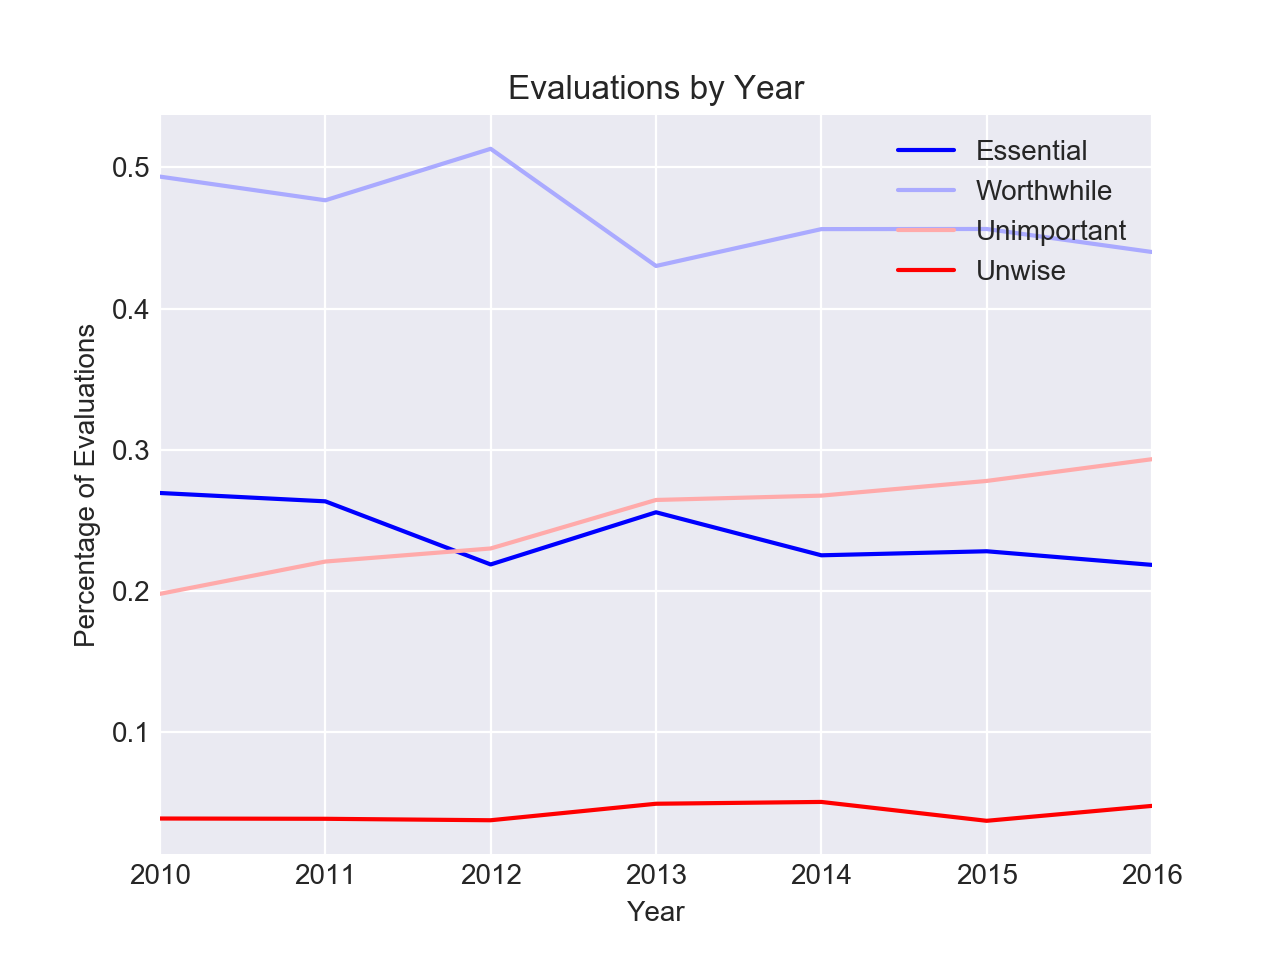

In [14]:
percentages(df.groupby('Year').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings')[ratings].plot(cmap='bwr')
plt.xlim(2010,2016)
plt.ylabel('Percentage of Evaluations')
plt.title('Evaluations by Year');

### Industry Track?

In [15]:
percentages(df.groupby('IndTrack').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').drop('NotShown', axis=1).sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,PosRatings,NegRatings,TotalRatings
IndTrack,,,,,,,,
Yes,0.279446,0.461894,0.219400,0.039261,0.055427,0.741339,0.258661,433
No,0.229665,0.465311,0.260167,0.044856,0.072368,0.694976,0.305024,1672


Counts

<IPython.core.display.Javascript object>


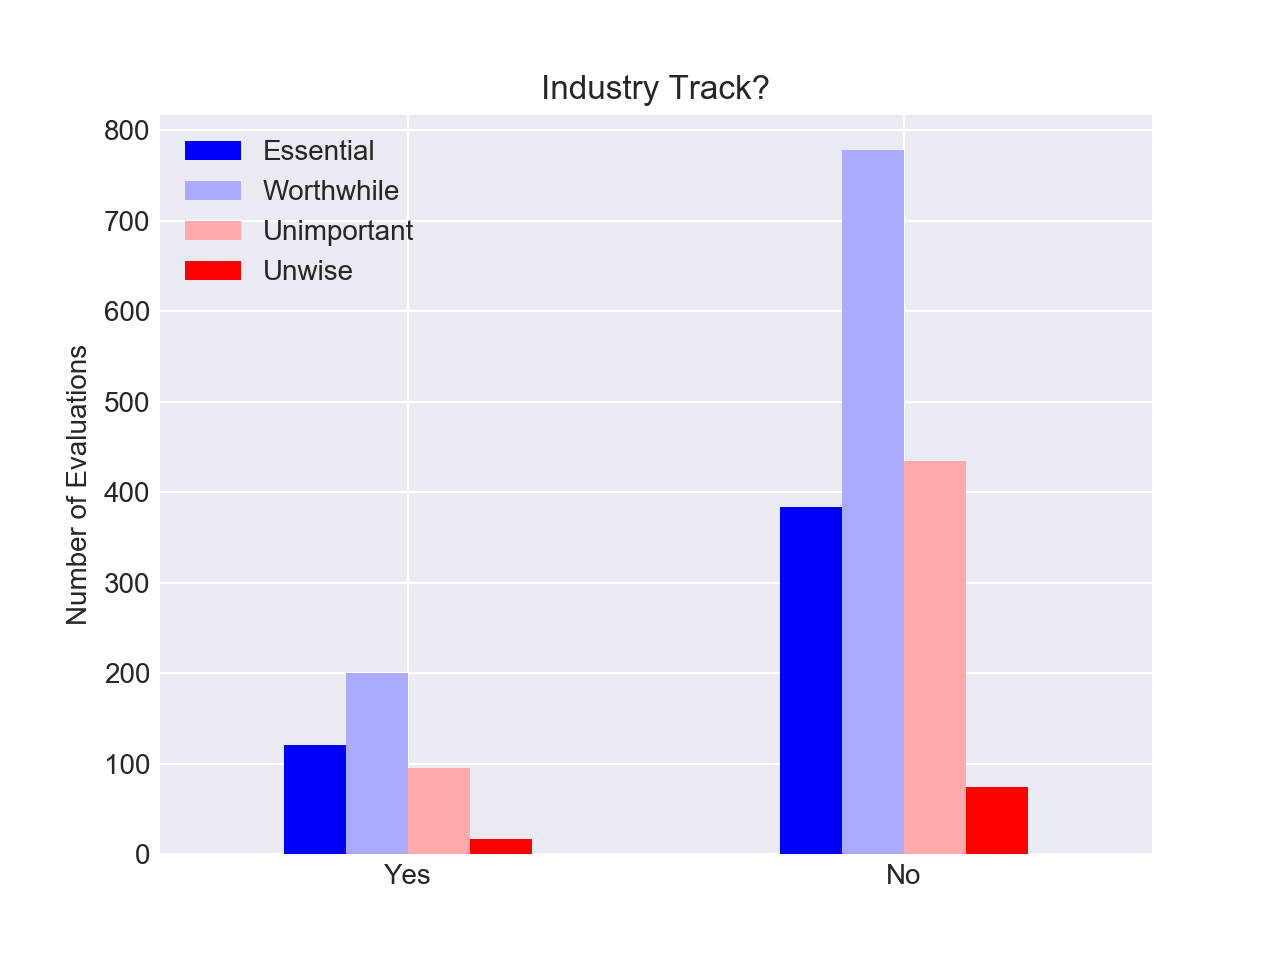

In [16]:
colslice(
    nozeroes.groupby('IndTrack').sum()[
            list(nozeroes.columns.values)[1:8]].sort_values('PosRatings', ascending=True), 0,4
).plot.bar(rot=0, stacked=False, cmap='bwr')
plt.xlabel('')
plt.ylabel('Number of Evaluations')
plt.title('Industry Track?')
plt.legend(loc='upper left');

Percentages

<IPython.core.display.Javascript object>


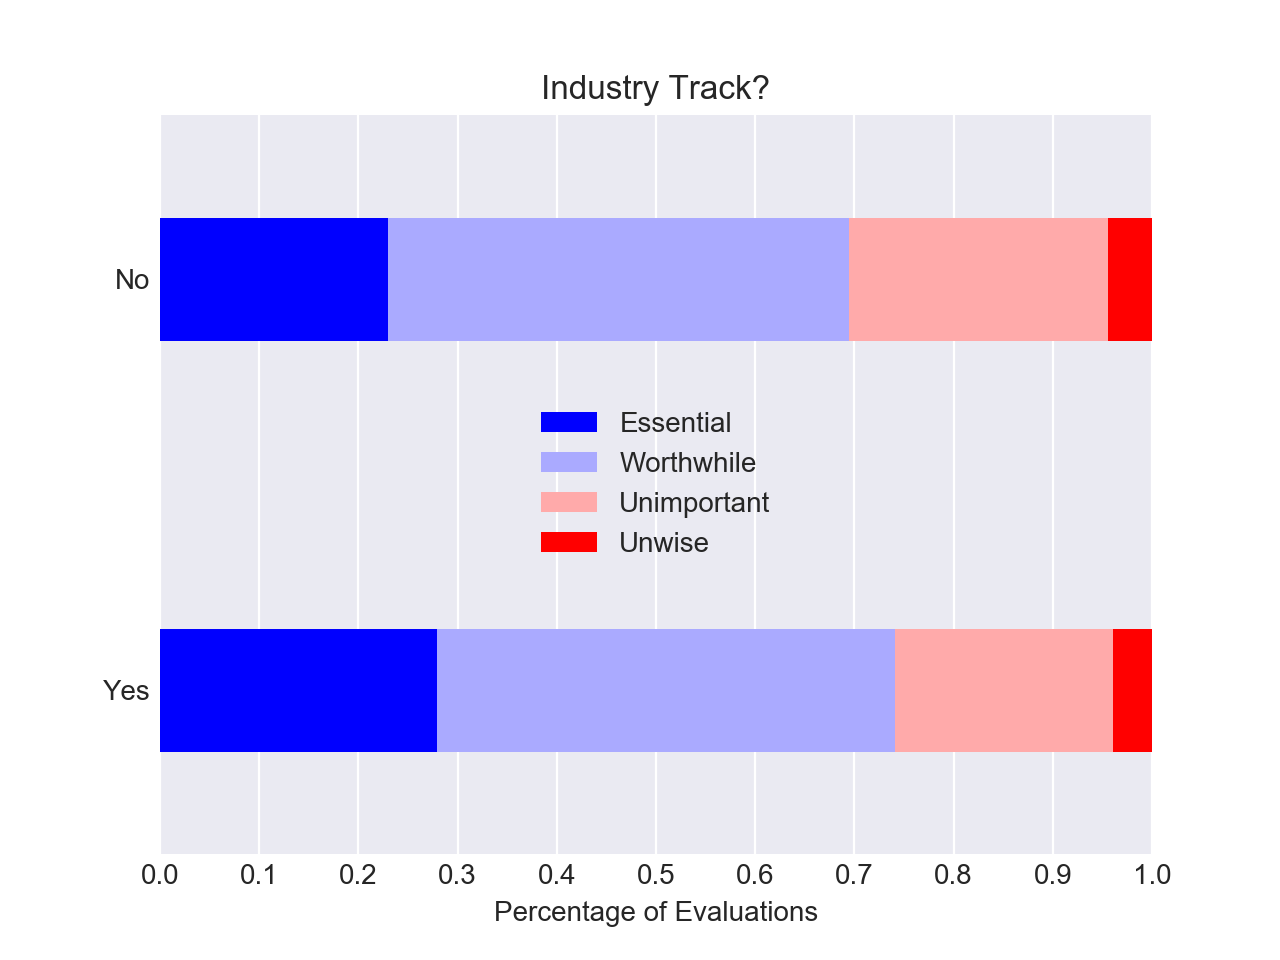

In [29]:
colslice(
    percentages(
        nozeroes.groupby('IndTrack').sum()[
            list(nozeroes.columns.values)[1:8]], 'TotalRatings'
    ).sort_values('PosRatings', ascending=False), 0,4
).plot.barh(rot=0, stacked=True, cmap='bwr', width=0.3)
plt.ylabel('')
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel('Percentage of Evaluations')
plt.title('Industry Track?')
plt.legend(loc='center');

### Academic or Industry Affiliation?

In [27]:
percentages(df.groupby('AcadVsInd').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').drop('NotShown',axis=1).sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,PosRatings,NegRatings,TotalRatings
AcadVsInd,,,,,,,,
Industry,0.294479,0.453988,0.202454,0.049080,0.049080,0.748466,0.251534,163
Mixed,0.238579,0.505076,0.218274,0.038071,0.058376,0.743655,0.256345,394
Academic,0.234496,0.455426,0.265504,0.044574,0.073643,0.689922,0.310078,1548


Counts

<IPython.core.display.Javascript object>


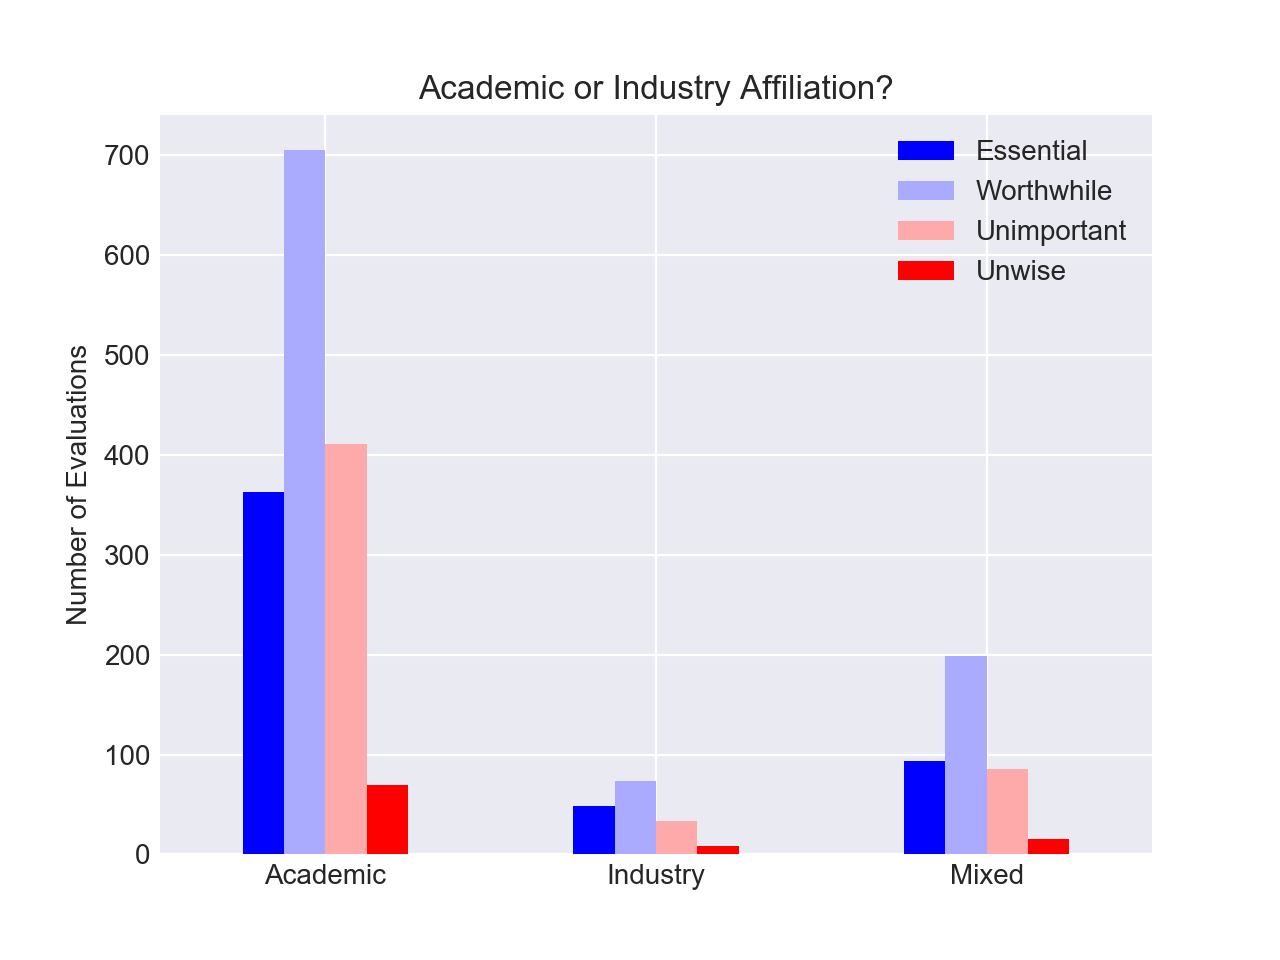

In [28]:
colslice(
    nozeroes.groupby('AcadVsInd').sum()[
            list(nozeroes.columns.values)[1:8]], 0,4
).plot.bar(rot=0, stacked=False, cmap='bwr')
plt.xlabel('')
plt.ylabel('Number of Evaluations')
plt.title('Academic or Industry Affiliation?')
plt.legend(loc='upper right');

Percentages

<IPython.core.display.Javascript object>


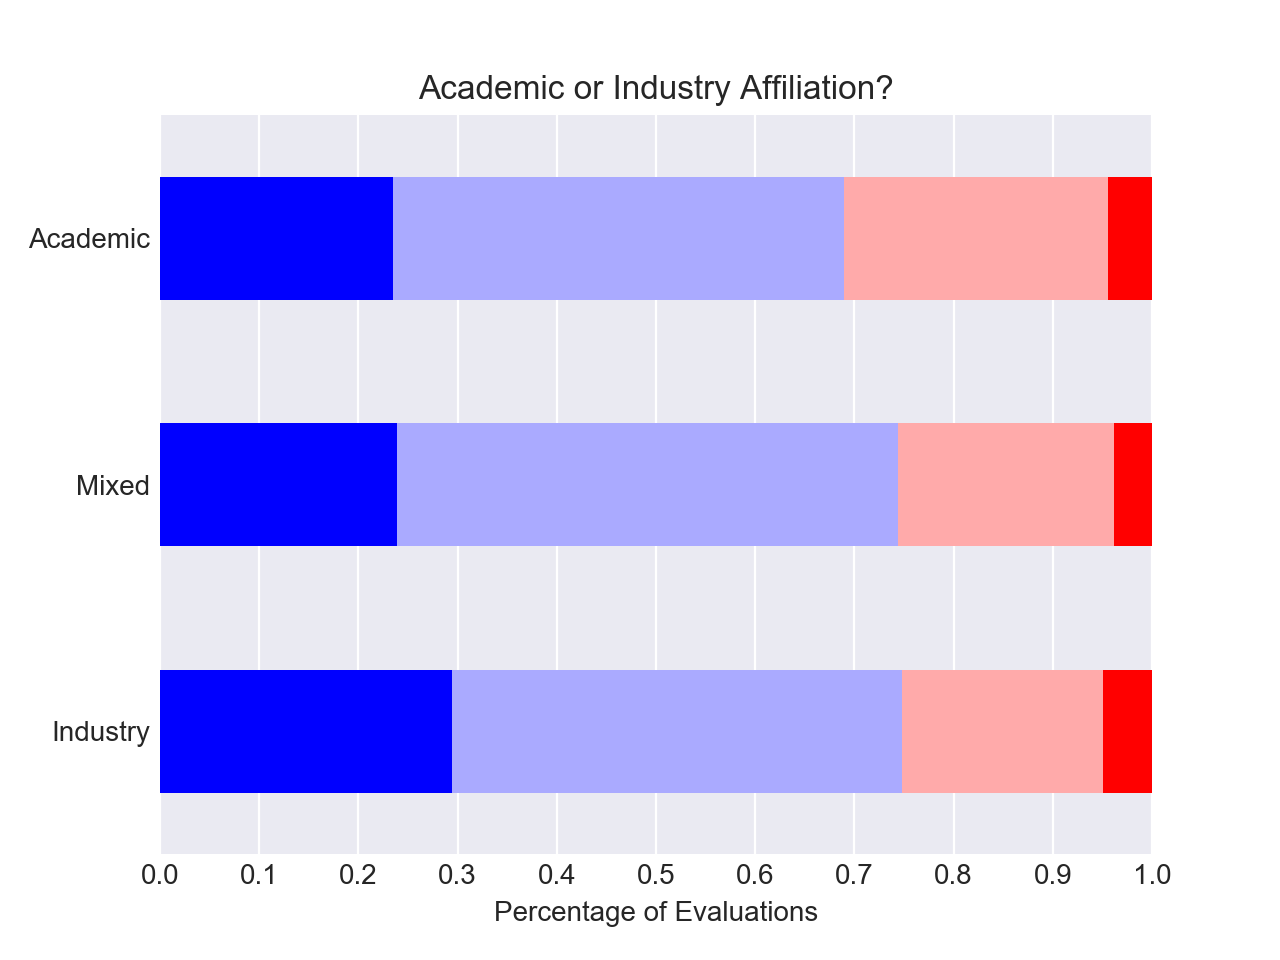

In [35]:
graphic(nozeroes, 0,4,'AcadVsInd')
plt.title('Academic or Industry Affiliation?')
plt.legend([])
plt.xticks(np.arange(0,1.1,0.1));

The End.